## IMPORTING LIBRARY

In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
dataset = pd.read_csv('C:/Users/Uma Shankar/Downloads/INFY.csv',index_col='Date')
dataset = dataset.dropna()
X = dataset[['Open', 'High', 'Low']]
y = dataset[ 'Close']
print(X.head())
print('\n')
print(y.head())

                Open      High       Low
Date                                    
1999-03-11  0.583984  0.781250  0.583984
1999-03-12  0.734375  0.761719  0.671875
1999-03-15  0.730469  0.730469  0.658203
1999-03-16  0.667969  0.691406  0.656250
1999-03-17  0.656250  0.699219  0.652344


Date
1999-03-11    0.732422
1999-03-12    0.728516
1999-03-15    0.662109
1999-03-16    0.656250
1999-03-17    0.660156
Name: Close, dtype: float64


In [3]:
split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [6]:
classifier = Sequential()
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adadelta', loss = 'mean_squared_error')
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
455/455 [==============================] - 1s 1ms/step - loss: 33.1634
Epoch 2/100
455/455 [==============================] - 0s 988us/step - loss: 33.0996
Epoch 3/100
455/455 [==============================] - 0s 965us/step - loss: 33.0210
Epoch 4/100
455/455 [==============================] - 0s 993us/step - loss: 32.9128
Epoch 5/100
455/455 [==============================] - 1s 1ms/step - loss: 32.7508
Epoch 6/100
455/455 [==============================] - 1s 1ms/step - loss: 32.4909
Epoch 7/100
455/455 [==============================] - 0s 968us/step - loss: 32.0449
Epoch 8/100
455/455 [==============================] - 0s 989us/step - loss: 31.2700
Epoch 9/100
455/455 [==============================] - 0s 978us/step - loss: 29.9361
Epoch 10/100
455/455 [==============================] - 0s 980us/step - loss: 27.7079
Epoch 11/100
455/455 [==============================] - 0s 991us/step - loss: 24.1040
Epoch 12/100
455/455 [==============================] - 0s 1ms/step -

In [7]:
y_pred = classifier.predict(X_test)
y_pred

array([[ 7.6654863],
       [ 7.6767035],
       [ 7.630319 ],
       ...,
       [22.23253  ],
       [22.58594  ],
       [22.51076  ]], dtype=float32)

In [8]:
y_test.head()

Date
2017-04-05    7.680
2017-04-06    7.680
2017-04-07    7.635
2017-04-10    7.585
2017-04-11    7.545
Name: Close, dtype: float64

In [9]:
df=pd.DataFrame(y_test)
df["y pred"]=y_pred
df

,Close,y pred
Date,,
2017-04-05,7.680000,7.665486
2017-04-06,7.680000,7.676703
2017-04-07,7.635000,7.630319
2017-04-10,7.585000,7.508945
2017-04-11,7.545000,7.556476
...,...,...
2021-10-04,22.150000,22.141579
2021-10-05,22.750000,22.343224
2021-10-06,22.450001,22.232531


In [10]:
df.head()

,Close,y pred
Date,,
2017-04-05,7.680,7.665486
2017-04-06,7.680,7.676703
2017-04-07,7.635,7.630319
2017-04-10,7.585,7.508945
2017-04-11,7.545,7.556476


In [11]:
df.tail()

,Close,y pred
Date,,
2021-10-04,22.150000,22.141579
2021-10-05,22.750000,22.343224
2021-10-06,22.450001,22.232531
2021-10-07,22.770000,22.585939
2021-10-08,21.930000,22.510759


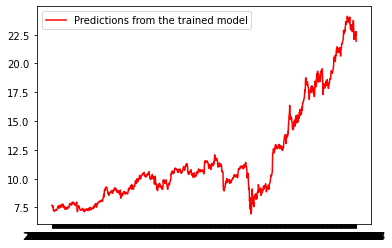

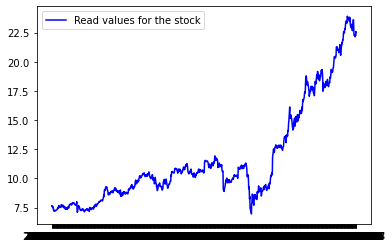

In [12]:
import matplotlib.pyplot as plt
plt.plot(df['Close'],color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(df['y pred'],color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()

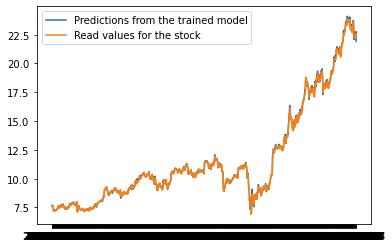

In [13]:
import matplotlib.pyplot as plt
plt.plot(df['Close'], label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.plot(df['y pred'], label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()

In [14]:
trainScore = classifier.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01 MSE (0.10 RMSE)
Test Score: 0.01 MSE (0.10 RMSE)


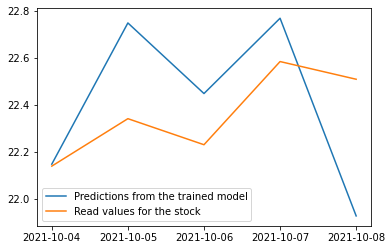

In [15]:
import matplotlib.pyplot as plt
plt.plot(df['Close'].tail(), label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.plot(df['y pred'].tail(), label='Read values for the stock')
plt.legend(loc='lower left')
plt.show()

In [16]:
df.tail()

,Close,y pred
Date,,
2021-10-04,22.150000,22.141579
2021-10-05,22.750000,22.343224
2021-10-06,22.450001,22.232531
2021-10-07,22.770000,22.585939
2021-10-08,21.930000,22.510759


In [17]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-03-11,0.583984,0.781250,0.583984,0.732422,0.512236,172512000
1999-03-12,0.734375,0.761719,0.671875,0.728516,0.509504,39897600
1999-03-15,0.730469,0.730469,0.658203,0.662109,0.463061,12672000
1999-03-16,0.667969,0.691406,0.656250,0.656250,0.458963,9984000
1999-03-17,0.656250,0.699219,0.652344,0.660156,0.461695,15449600
...,...,...,...,...,...,...
2021-10-04,22.290001,22.350000,22.030001,22.150000,22.150000,8654400
2021-10-05,22.290001,22.780001,22.290001,22.750000,22.750000,9498900
2021-10-06,22.320000,22.500000,22.150000,22.450001,22.450001,7134600
